In [46]:
import matplotlib.pyplot as plt
from tools._vectools import e_n
from scipy.optimize import root_scalar
from scipy.linalg import expm

import numpy as np
np.set_printoptions(linewidth=np.inf, precision=2)

In [47]:
def add_conj(mat):
    return mat + mat.conj().T

def H_cell(phi,U):
    #0,4,7,9 are the doubly occupied states
    mat = np.zeros((10,10),dtype="complex128")
    
    mat[0,0] = U/2
    mat[0,1] = mat[0,2] = np.sqrt(2) #1
    
    mat[1,3] = mat[1,5] = 1
    
    mat[2,5] = 1
    mat[2,3] = np.exp(1j*phi)
    
    mat[3,6] = mat[3,8] = 1
    
    mat[4,4] = U/2
    mat[4,1] = mat[4,6] = np.sqrt(2) #1
    
    mat[5,6] = np.exp(1j*phi)
    mat[5,8] = 1
    
    
    mat[7,7] = U/2
    mat[7,2] = np.sqrt(2)#1
    mat[7,8] = np.sqrt(2)*np.exp(1j*phi)
    
    mat[9,9] = U/2
    mat[9,6] = np.sqrt(2)#1
    mat[9,8]  = np.sqrt(2)*np.exp(-1j*phi)
    
    return add_conj(mat)

N = 10
n_alpha = 2*np.outer(e_n(0,N),e_n(0,N)) + np.outer(e_n(1,N),e_n(1,N)) + np.outer(e_n(2,N),e_n(2,N)) + np.outer(e_n(3,N),e_n(3,N))
n_beta = 2*np.outer(e_n(4,N),e_n(4,N)) + np.outer(e_n(1,N),e_n(1,N)) + np.outer(e_n(5,N),e_n(5,N)) + np.outer(e_n(6,N),e_n(6,N))
n_gamma = 2*np.outer(e_n(7,N),e_n(7,N)) + np.outer(e_n(2,N),e_n(2,N)) + np.outer(e_n(5,N),e_n(5,N)) + np.outer(e_n(8,N),e_n(8,N))
n_delta = 2*np.outer(e_n(9,N),e_n(9,N)) + np.outer(e_n(3,N),e_n(3,N)) + np.outer(e_n(6,N),e_n(6,N)) + np.outer(e_n(8,N),e_n(8,N))



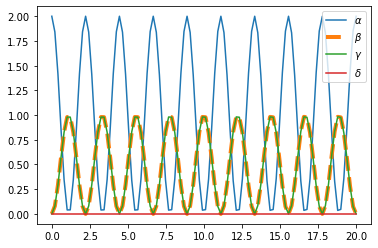

In [48]:
ham = H_cell(np.pi,0)
N = np.shape(ham)[1]
T = 20
steps = 100
init_states = [e_n(0,N)]#[1/np.sqrt(2) * (e_n(0,N) +e_n(N-1,N) )]

for idx, state in enumerate(init_states):
    time = np.linspace(0,T,steps)
    supp_a = []
    supp_b = []
    supp_c = []
    supp_d = []

    for t in time:
        supp_a.append( np.abs(state.conj().T @  expm(-1j * t * ham) @ n_alpha @ expm(1j * t * ham) @ state))
        supp_b.append( np.abs(state.conj().T @  expm(-1j * t * ham) @ n_beta @ expm(1j * t * ham) @ state))
        supp_c.append( np.abs(state.conj().T @  expm(-1j * t * ham) @ n_gamma @ expm(1j * t * ham) @ state))
        supp_d.append( np.abs(state.conj().T @  expm(-1j * t * ham) @ n_delta @ expm(1j * t * ham) @ state))
        

        
plt.plot(time,supp_a,label=r"$\alpha$")
plt.plot(time,supp_b,label=r"$\beta$",linestyle="--",lw=4)
plt.plot(time,supp_c,label=r"$\gamma$")
plt.plot(time,supp_d,label=r"$\delta$")

plt.legend()

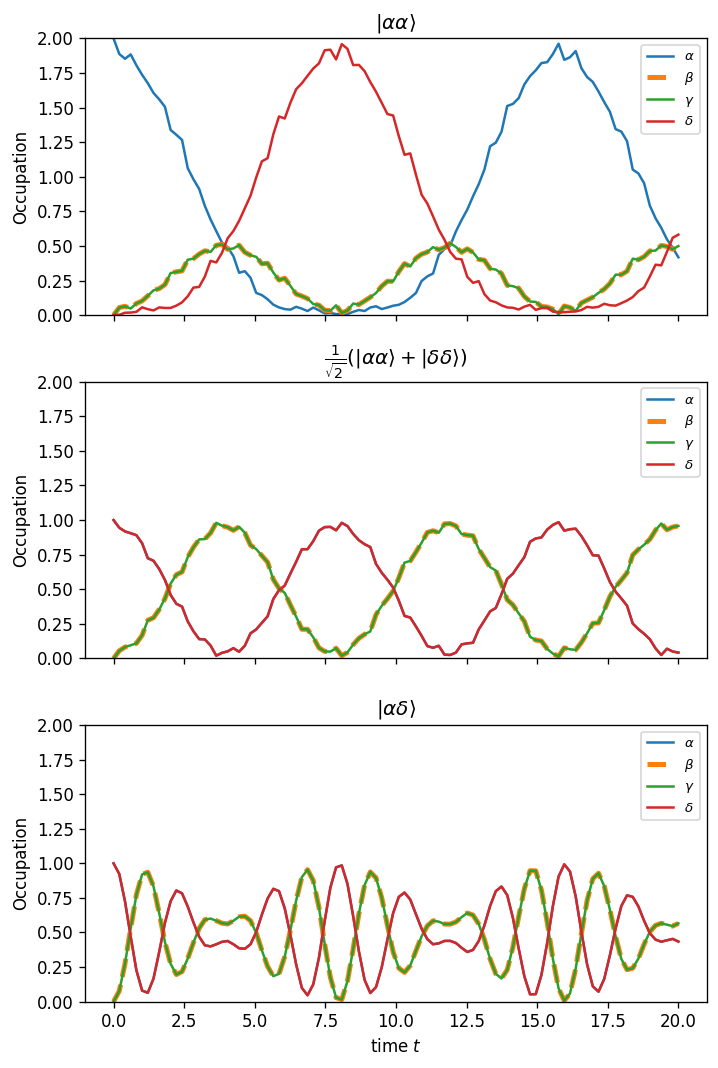

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# --- parameters & Hamiltonian ------------------------------------------------
phi = 0
U = 10
ham  = H_cell(phi, U)
N    = ham.shape[1]

T     = 20          # total evolution time
steps = 100         # number of time samples
time  = np.linspace(0, T, steps)

# ----------------------------------------------------------------------------- 
# add as many states here as you wish
init_states = [
    e_n(0, N),
    1/np.sqrt(2) * (e_n(0, N) + e_n(N-1, N)),
    e_n(3, N)
]
state_labels = [r"$ | \alpha \alpha \rangle$", r"$\frac{1}{\sqrt{2}}( | \alpha \alpha \rangle + | \delta \delta \rangle )$", r"$ | \alpha \delta \rangle$"]


# --- plotting ---------------------------------------------------------------
n_states              = len(init_states)
fig, axes             = plt.subplots(n_states, 1,
                                     figsize=(6, 3*n_states),
                                     sharex=True, dpi=120)
axes = np.atleast_1d(axes)            # ensures iterable even if n_states = 1

for idx, (state, ax) in enumerate(zip(init_states, axes), start=1):
    supp_a, supp_b, supp_c, supp_d = [], [], [], []

    for t in time:
        U    = expm(-1j * t * ham)     # U(t)
        Udag = U.conj().T              # U†(t)

        supp_a.append(abs(state.conj().T @ U @ n_alpha  @ Udag @ state))
        supp_b.append(abs(state.conj().T @ U @ n_beta   @ Udag @ state))
        supp_c.append(abs(state.conj().T @ U @ n_gamma  @ Udag @ state))
        supp_d.append(abs(state.conj().T @ U @ n_delta  @ Udag @ state))

    # draw the four curves for this initial state
    ax.plot(time, supp_a, label=r"$\alpha$")
    ax.plot(time, supp_b, label=r"$\beta$", linestyle="--", lw=3)
    ax.plot(time, supp_c, label=r"$\gamma$")
    ax.plot(time, supp_d, label=r"$\delta$")
    ax.set_ylim(0,2)

    ax.set_ylabel("Occupation")
    ax.set_title(state_labels[idx-1])
    ax.legend(fontsize=8)

# shared x-axis label on bottom subplot only
axes[-1].set_xlabel("time $t$")
fig.tight_layout()

plt.show()


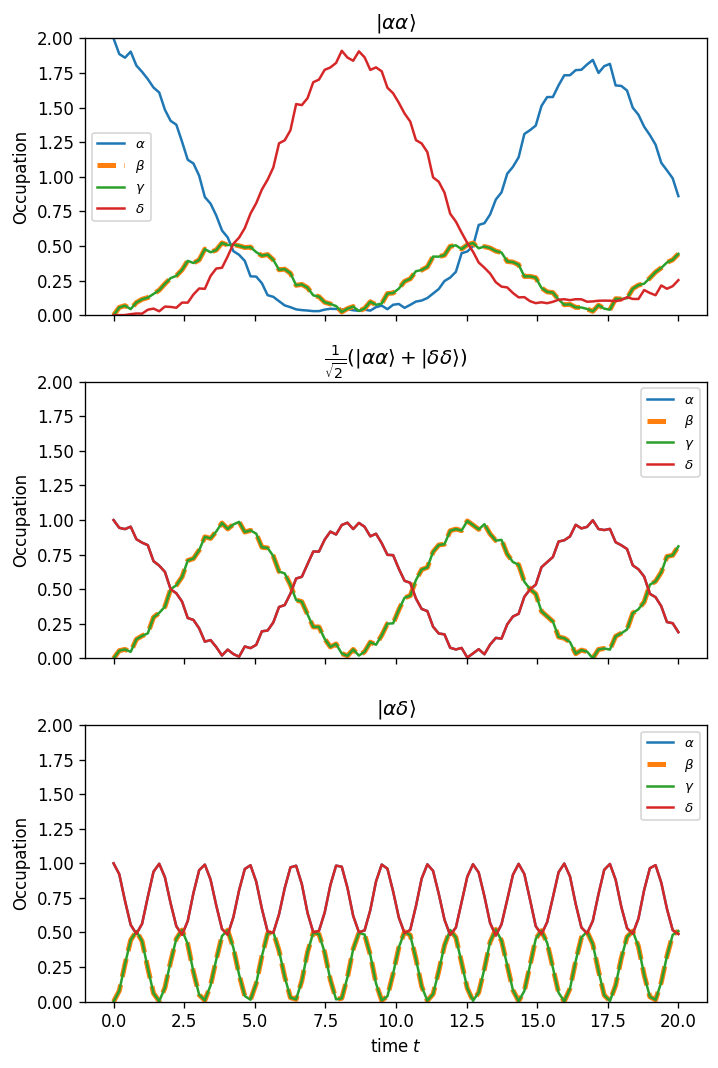

In [50]:
ham  = H_cell(np.pi, 10)
N    = ham.shape[1]

T     = 20          # total evolution time
steps = 100         # number of time samples
time  = np.linspace(0, T, steps)

# ----------------------------------------------------------------------------- 
# add as many states here as you wish
init_states = [
    e_n(0, N),
    1/np.sqrt(2) * (e_n(0, N) + e_n(N-1, N)),
    e_n(3, N)
]

state_labels = [r"$ | \alpha \alpha \rangle$", r"$\frac{1}{\sqrt{2}}( | \alpha \alpha \rangle + | \delta \delta \rangle )$", r"$ | \alpha \delta \rangle$"]

# --- plotting ---------------------------------------------------------------
n_states              = len(init_states)
fig, axes             = plt.subplots(n_states, 1,
                                     figsize=(6, 3*n_states),
                                     sharex=True, dpi=120)
axes = np.atleast_1d(axes)            # ensures iterable even if n_states = 1

for idx, (state, ax) in enumerate(zip(init_states, axes), start=1):
    supp_a, supp_b, supp_c, supp_d = [], [], [], []

    for t in time:
        U    = expm(-1j * t * ham)     # U(t)
        Udag = U.conj().T              # U†(t)

        supp_a.append(abs(state.conj().T @ U @ n_alpha  @ Udag @ state))
        supp_b.append(abs(state.conj().T @ U @ n_beta   @ Udag @ state))
        supp_c.append(abs(state.conj().T @ U @ n_gamma  @ Udag @ state))
        supp_d.append(abs(state.conj().T @ U @ n_delta  @ Udag @ state))

    # draw the four curves for this initial state
    ax.plot(time, supp_a, label=r"$\alpha$")
    ax.plot(time, supp_b, label=r"$\beta$", linestyle="--", lw=3)
    ax.plot(time, supp_c, label=r"$\gamma$")
    ax.plot(time, supp_d, label=r"$\delta$")
    ax.set_ylim(0,2)
    ax.set_ylabel("Occupation")
    #ax.set_title(f"Initial state #{idx}")
    ax.set_title(state_labels[idx-1])
    ax.legend(fontsize=8)

# shared x-axis label on bottom subplot only
axes[-1].set_xlabel("time $t$")
fig.tight_layout()
plt.show()

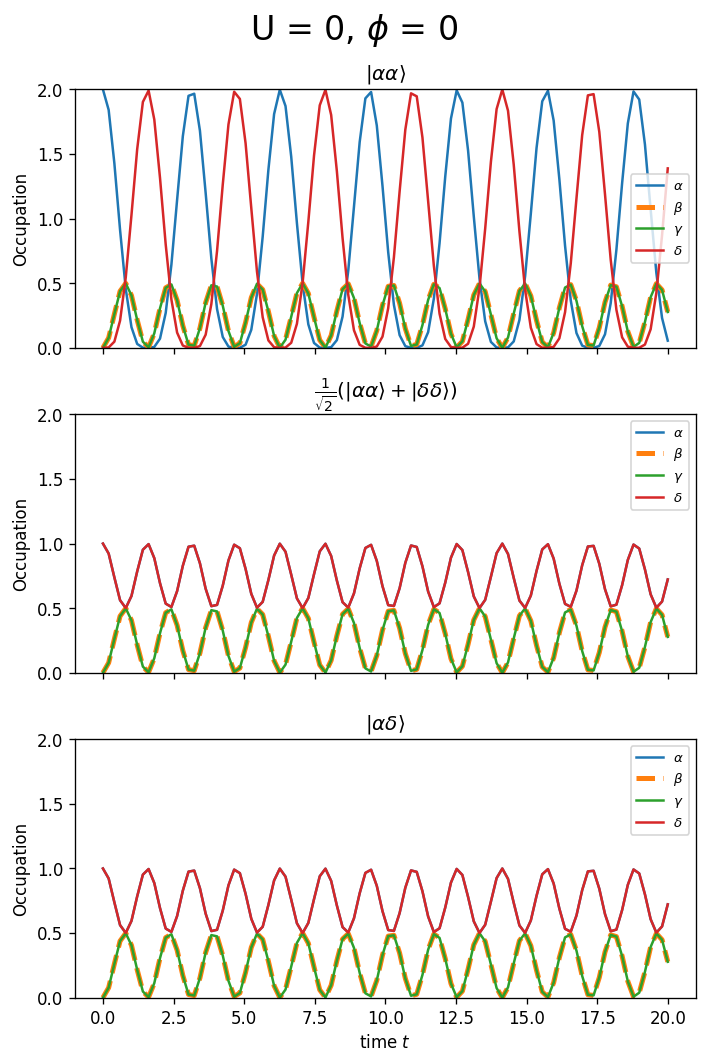

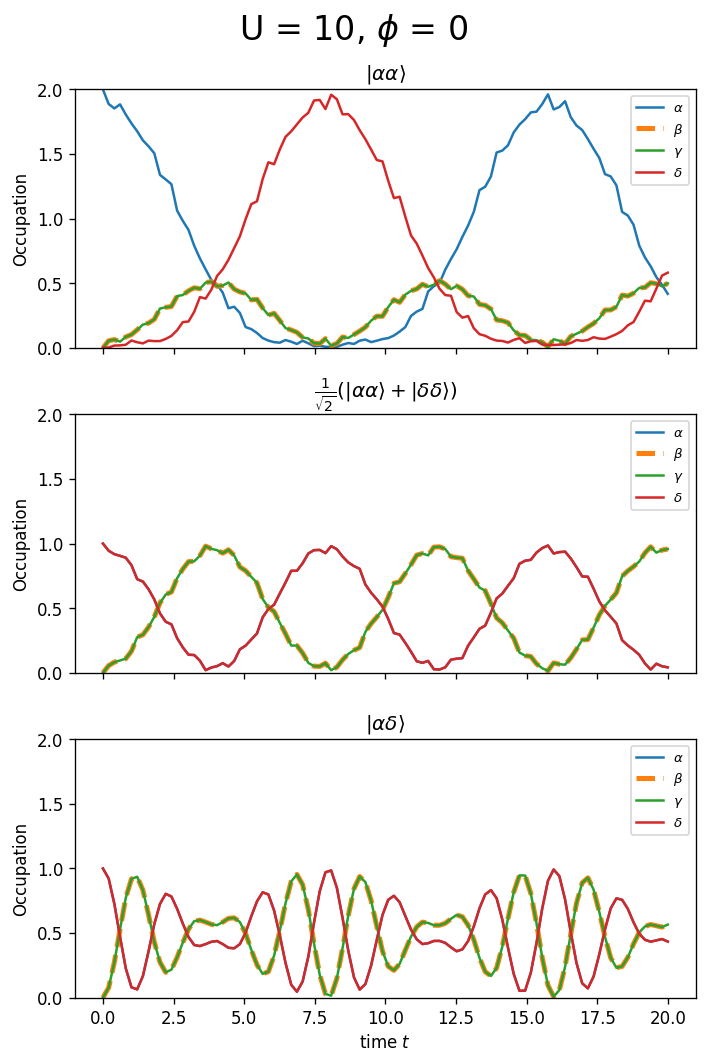

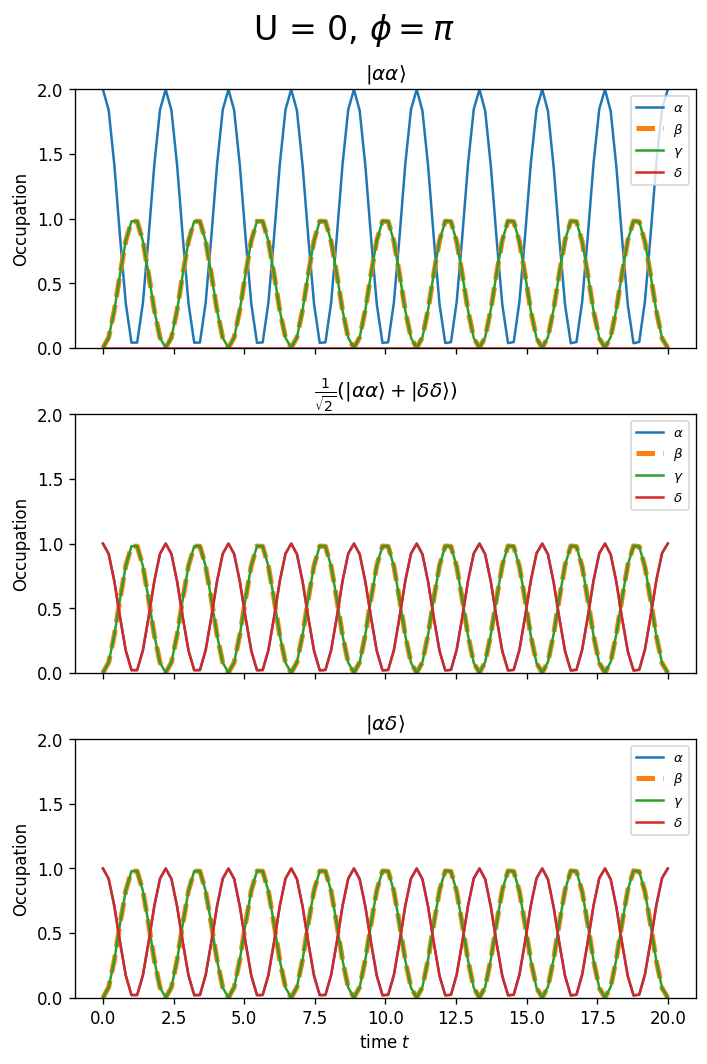

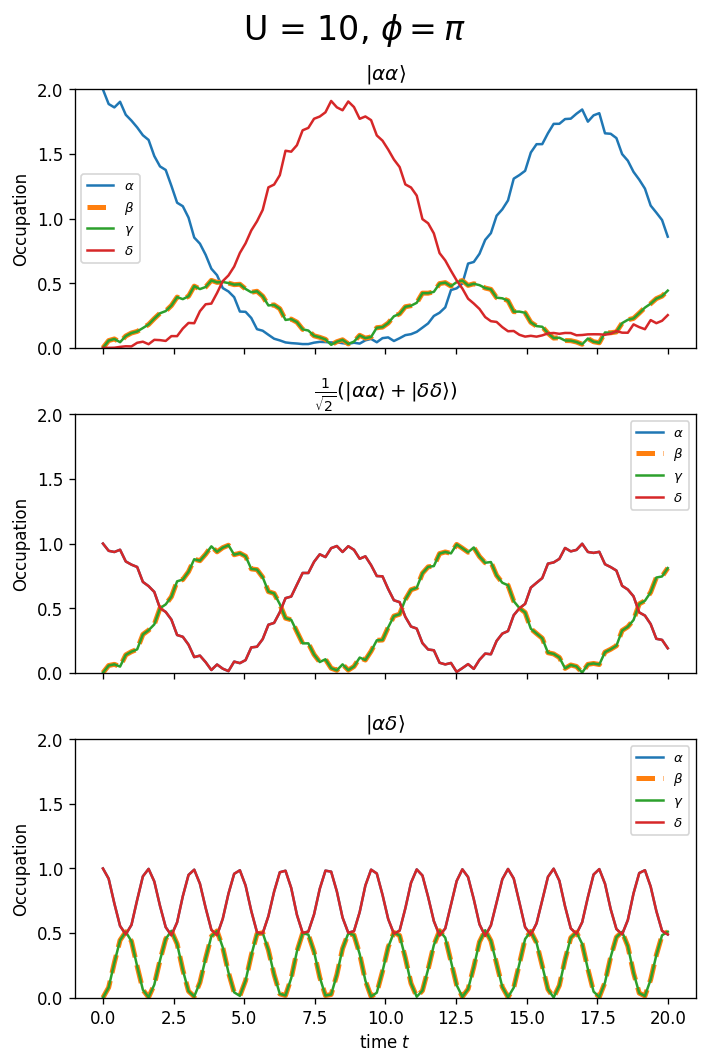

In [51]:


phis = [0,0,np.pi,np.pi]
Us = [0,10,0,10]
titles=["0U0phi_sing.pdf","10U0phi_sing.pdf","0Upiphi_sing.pdf","10Upiphi_sing.pdf"]

for i in range(len(phis)):
    # --- parameters & Hamiltonian ------------------------------------------------
    ham  = H_cell(phis[i], Us[i])
    N    = ham.shape[1]

    T     = 20          # total evolution time
    steps = 100         # number of time samples
    time  = np.linspace(0, T, steps)

    # ----------------------------------------------------------------------------- 
    # add as many states here as you wish
    init_states = [
        e_n(0, N),
        1/np.sqrt(2) * (e_n(0, N) + e_n(N-1, N)),
        e_n(3, N)
    ]
    state_labels = [r"$ | \alpha \alpha \rangle$", r"$\frac{1}{\sqrt{2}}( | \alpha \alpha \rangle + | \delta \delta \rangle )$", r"$ | \alpha \delta \rangle$"]


    # --- plotting ---------------------------------------------------------------
    n_states              = len(init_states)
    fig, axes             = plt.subplots(n_states, 1,
                                        figsize=(6, 3*n_states),
                                        sharex=True, dpi=120)
    axes = np.atleast_1d(axes)            # ensures iterable even if n_states = 1
    if phis[i] == 0:
        fig.suptitle(f"U = {Us[i]}, $\phi$ = 0",fontsize=20)
    else:
        fig.suptitle(f"U = {Us[i]}, $\phi = \pi$",fontsize=20)

    for idx, (state, ax) in enumerate(zip(init_states, axes), start=1):
        supp_a, supp_b, supp_c, supp_d = [], [], [], []

        for t in time:
            U    = expm(-1j * t * ham)     # U(t)
            Udag = U.conj().T              # U†(t)

            supp_a.append(abs(state.conj().T @ U @ n_alpha  @ Udag @ state))
            supp_b.append(abs(state.conj().T @ U @ n_beta   @ Udag @ state))
            supp_c.append(abs(state.conj().T @ U @ n_gamma  @ Udag @ state))
            supp_d.append(abs(state.conj().T @ U @ n_delta  @ Udag @ state))

        # draw the four curves for this initial state
        ax.plot(time, supp_a, label=r"$\alpha$")
        ax.plot(time, supp_b, label=r"$\beta$", linestyle="--", lw=3)
        ax.plot(time, supp_c, label=r"$\gamma$")
        ax.plot(time, supp_d, label=r"$\delta$")
        ax.set_ylim(0,2)

        ax.set_ylabel("Occupation")
        ax.set_title(state_labels[idx-1])
        ax.legend(fontsize=8)

    # shared x-axis label on bottom subplot only
    axes[-1].set_xlabel("time $t$")
    fig.tight_layout()

    plt.savefig(titles[i])
